<a href="https://colab.research.google.com/github/Ilham-0104/Machine_Learning_Data_Science/blob/main/Bag_14_Time_Series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from prophet import Prophet

In [ ]:
WMT = pd.read_csv("/content/WMT.csv")

In [ ]:
WMT.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1972-08-25,0.063477,0.064697,0.063477,0.064453,0.036447,2508800
1,1972-08-28,0.064453,0.064941,0.064209,0.064209,0.036309,972800
2,1972-08-29,0.063965,0.063965,0.063477,0.063477,0.035895,1945600
3,1972-08-30,0.063477,0.063477,0.062988,0.063477,0.035895,409600
4,1972-08-31,0.062988,0.062988,0.062500,0.062500,0.035343,870400


In [ ]:
WMT.describe()

,Open,High,Low,Close,Adj Close,Volume
count,12491.000000,12491.000000,12491.000000,12491.000000,12491.000000,1.249100e+04
mean,35.479198,35.811310,35.151302,35.485380,28.948680,7.540560e+06
std,37.207071,37.519419,36.914186,37.214409,34.585375,6.237162e+06
min,0.015625,0.015625,0.014404,0.015625,0.008889,0.000000e+00
25%,1.386719,1.402344,1.375000,1.386719,0.858323,3.883600e+06
50%,16.437500,16.593750,16.250000,16.375000,10.588767,6.312800e+06
75%,56.395001,57.000000,55.664999,56.316250,40.920847,9.511400e+06
max,153.600006,153.660004,151.660004,152.789993,150.842651,1.318336e+08


In [ ]:
WMT.dtypes

,0
Date,object
Open,float64
High,float64
Low,float64
Close,float64
Adj Close,float64
Volume,int64


In [ ]:
WMT["Date"] = pd.to_datetime(WMT["Date"])
WMT.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12491 entries, 0 to 12490
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       12491 non-null  datetime64[ns]
 1   Open       12491 non-null  float64       
 2   High       12491 non-null  float64       
 3   Low        12491 non-null  float64       
 4   Close      12491 non-null  float64       
 5   Adj Close  12491 non-null  float64       
 6   Volume     12491 non-null  int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 683.2 KB


In [ ]:
WMT.dtypes

,0
Date,datetime64[ns]
Open,float64
High,float64
Low,float64
Close,float64
Adj Close,float64
Volume,int64


In [ ]:
WMT = WMT[["Date", "High"]]
WMT.head()

,Date,High
0,1972-08-25,0.064697
1,1972-08-28,0.064941
2,1972-08-29,0.063965
3,1972-08-30,0.063477
4,1972-08-31,0.062988


In [ ]:
WMT.columns = ["ds", "y"]
WMT.head()

,ds,y
0,1972-08-25,0.064697
1,1972-08-28,0.064941
2,1972-08-29,0.063965
3,1972-08-30,0.063477
4,1972-08-31,0.062988


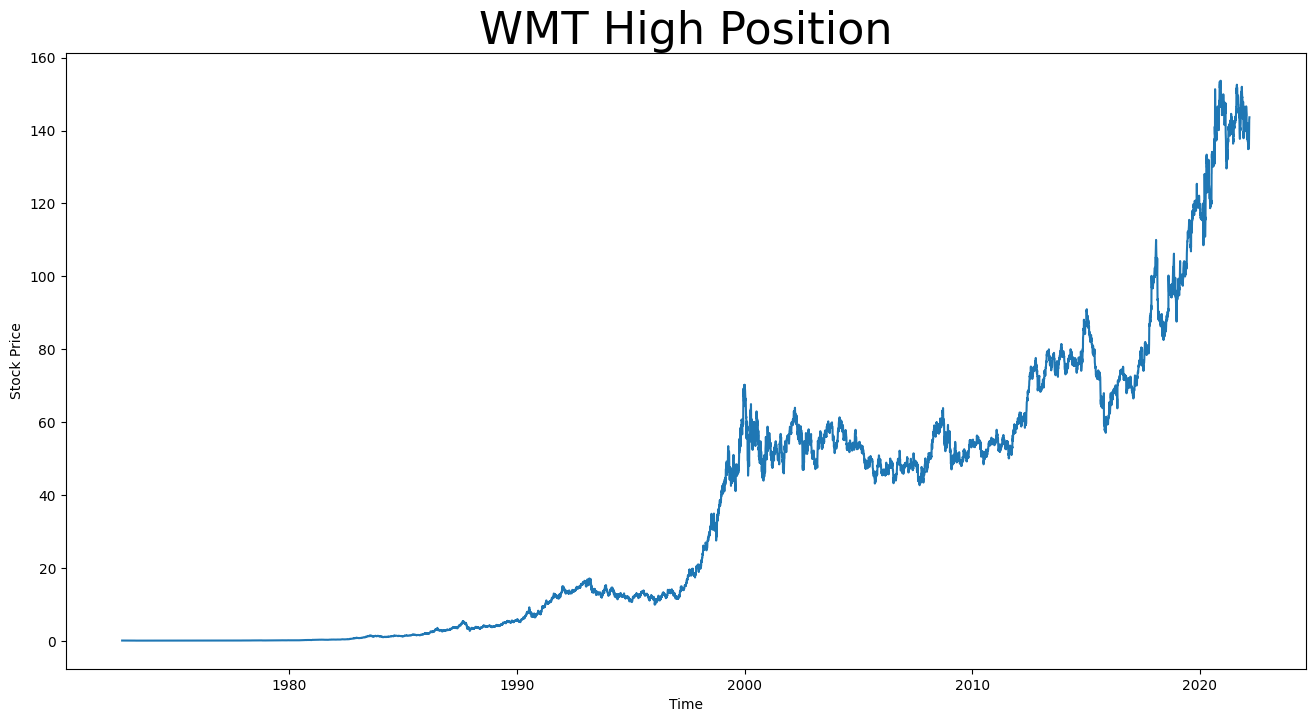

In [ ]:
plt.figure(figsize=(16, 8))
plt.plot(WMT["ds"], WMT["y"])

plt.title("WMT High Position", fontsize=32)
plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.show()

In [ ]:
# Plotly for Dynamic Visualization
import plotly.express as px

fig = px.line(WMT, x="ds", y="y", title="Walmart High Price in Years")
fig.show()

NameError: name 'WMT' is not defined

In [ ]:
model = Prophet()
model.fit(WMT)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2f4lyiwu/jwe6ihoh.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2f4lyiwu/6l70dmfv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=64719', 'data', 'file=/tmp/tmp2f4lyiwu/jwe6ihoh.json', 'init=/tmp/tmp2f4lyiwu/6l70dmfv.json', 'output', 'file=/tmp/tmp2f4lyiwu/prophet_modelubfw3mmc/prophet_model-20240909000758.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:07:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:08:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
# Membuat data tanggal kosong untuk di forecast olej Prophet

future = model.make_future_dataframe(periods=365*10, freq="D") # 365 itu adalah jumlah hari dalam setahun, 10 adalah banyak tahunnya
forecats = model.predict(future)

/usr/local/lib/python3.10/dist-packages/prophet/plot.py:72: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

/usr/local/lib/python3.10/dist-packages/prophet/plot.py:73: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



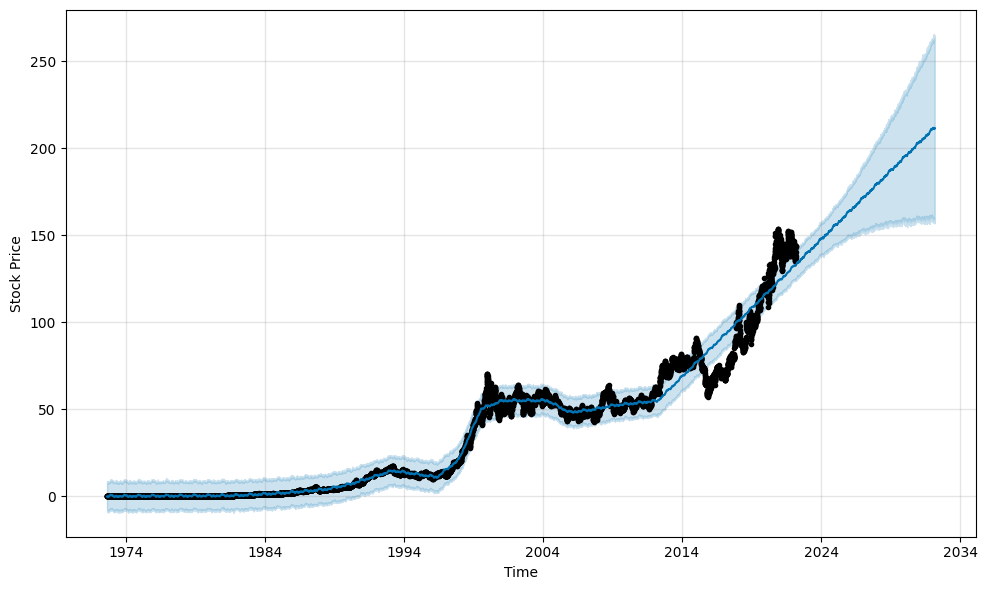

In [ ]:
model.plot(forecats,xlabel="Time", ylabel="Stock Price")
plt.show()

In [ ]:
from prophet.diagnostics import cross_validation

df_cv = cross_validation(model,
                         initial ="1000 days",
                         period = "180 days",
                         horizon="365 days")

INFO:prophet:Making 93 forecasts with cutoffs between 1975-11-04 00:00:00 and 2021-03-07 00:00:00


  0%|          | 0/93 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmp2f4lyiwu/2gzjwpbk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2f4lyiwu/8dv0xj76.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=32539', 'data', 'file=/tmp/tmp2f4lyiwu/2gzjwpbk.json', 'init=/tmp/tmp2f4lyiwu/8dv0xj76.json', 'output', 'file=/tmp/tmp2f4lyiwu/prophet_modelbimbz50w/prophet_model-20240908235912.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
23:59:12 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
23:59:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2f4lyiwu/6x3seca4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2f4lyiwu/3ebebrk6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

In [ ]:
from prophet.diagnostics import performance_metrics

df_performance = performance_metrics(df_cv)
df_performance

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,37 days,71.215430,8.438924,5.251923,0.146346,0.123376,0.150866,0.224809
1,38 days,71.665660,8.465557,5.261876,0.146590,0.124598,0.151111,0.224990
2,39 days,71.984563,8.484372,5.276031,0.147002,0.125394,0.151411,0.223218
3,40 days,72.453808,8.511980,5.292155,0.147315,0.126077,0.151631,0.221511
4,41 days,73.519738,8.574365,5.323039,0.147913,0.126758,0.152323,0.217456
...,...,...,...,...,...,...,...,...
324,361 days,151.747821,12.318597,8.245118,0.248211,0.217265,0.264910,0.146180
325,362 days,152.659231,12.355534,8.268798,0.249352,0.218024,0.266239,0.145033
326,363 days,153.407805,12.385790,8.277667,0.250031,0.218024,0.267227,0.146078
327,364 days,153.398991,12.385435,8.281501,0.250682,0.219888,0.267918,0.145824


In [ ]:
# Buat data range di Pandas
data_range = pd.date_range(start = '2024-07-27', periods = 84)
data_range[:20]

DatetimeIndex(['2024-07-27', '2024-07-28', '2024-07-29', '2024-07-30',
               '2024-07-31', '2024-08-01', '2024-08-02', '2024-08-03',
               '2024-08-04', '2024-08-05', '2024-08-06', '2024-08-07',
               '2024-08-08', '2024-08-09', '2024-08-10', '2024-08-11',
               '2024-08-12', '2024-08-13', '2024-08-14', '2024-08-15'],
              dtype='datetime64[ns]', freq='D')

In [ ]:
data_range = pd.date_range(start = '2024-07-27', end = '2024-12-31')
data_range[10:]

DatetimeIndex(['2024-08-06', '2024-08-07', '2024-08-08', '2024-08-09',
               '2024-08-10', '2024-08-11', '2024-08-12', '2024-08-13',
               '2024-08-14', '2024-08-15',
               ...
               '2024-12-22', '2024-12-23', '2024-12-24', '2024-12-25',
               '2024-12-26', '2024-12-27', '2024-12-28', '2024-12-29',
               '2024-12-30', '2024-12-31'],
              dtype='datetime64[ns]', length=148, freq='D')

In [ ]:
data_range = pd.date_range(start = '2024-07-27', periods =30, freq="H") # Menjadi data per jam
data_range[:25]

DatetimeIndex(['2024-07-27 00:00:00', '2024-07-27 01:00:00',
               '2024-07-27 02:00:00', '2024-07-27 03:00:00',
               '2024-07-27 04:00:00', '2024-07-27 05:00:00',
               '2024-07-27 06:00:00', '2024-07-27 07:00:00',
               '2024-07-27 08:00:00', '2024-07-27 09:00:00',
               '2024-07-27 10:00:00', '2024-07-27 11:00:00',
               '2024-07-27 12:00:00', '2024-07-27 13:00:00',
               '2024-07-27 14:00:00', '2024-07-27 15:00:00',
               '2024-07-27 16:00:00', '2024-07-27 17:00:00',
               '2024-07-27 18:00:00', '2024-07-27 19:00:00',
               '2024-07-27 20:00:00', '2024-07-27 21:00:00',
               '2024-07-27 22:00:00', '2024-07-27 23:00:00',
               '2024-07-28 00:00:00'],
              dtype='datetime64[ns]', freq='H')

In [ ]:
!pip install pandas_datareader
import pandas_datareader.data as web

In [ ]:
def fetch_financial_data(company):
  return web.DataReader(name=company, data_source="stooq")

In [ ]:
nvidia = fetch_financial_data("NVDA")
nvidia

,Open,High,Low,Close,Volume
Date,,,,,
2024-09-06,108.04000,108.15000,100.95000,102.83000,4.136381e+08
2024-09-05,104.98500,109.65000,104.76000,107.21000,3.068507e+08
2024-09-04,105.41000,113.27000,104.12000,106.21000,3.724703e+08
2024-09-03,116.01000,116.21000,107.29000,108.00000,4.771551e+08
2024-08-30,119.53000,121.75000,117.22000,119.37000,3.337516e+08
...,...,...,...,...,...
2019-09-17,4.49117,4.50994,4.44451,4.50594,2.295459e+08
2019-09-16,4.45231,4.51912,4.44182,4.48448,2.329204e+08
2019-09-13,4.51892,4.55609,4.48378,4.52761,3.261156e+08


In [ ]:
nvidia.describe()
# Kapan harga nvidia saat close terendah
# Kapan harga nvidia saat close tertinggi

,Open,High,Low,Close,Volume
count,1256.000000,1256.000000,1256.000000,1256.000000,1.256000e+03
mean,30.309006,30.890314,29.678545,30.309839,4.536894e+08
std,29.754338,30.334736,29.041889,29.698878,1.850250e+08
min,4.292610,4.319780,4.213300,4.273840,9.810874e+07
25%,13.012950,13.239150,12.817900,12.989550,3.215498e+08
50%,18.823500,19.281000,18.487850,18.866200,4.278304e+08
75%,39.262500,40.098425,38.630850,39.354125,5.492377e+08
max,139.800000,140.760000,132.420000,135.580000,1.544406e+09


In [ ]:
nvidia[nvidia["Close"] <= 3.7]

,Open,High,Low,Close,Volume
Date,,,,,


In [ ]:
nvidia[nvidia["Close"] >= 135.58]

,Open,High,Low,Close,Volume
Date,,,,,
2024-06-18,131.14,136.33,130.69,135.58,294335054.0
